In [1]:
import sys
import os

import cv2
import numpy as np
import openslide
from skimage.color import rgb2hsv
from skimage.filters import threshold_otsu
from scipy import ndimage
import matplotlib.pyplot as plt
import tslide

/home/tsimage-w/nanfang


In [3]:
wsi_path = "2017-11-24 13_22_56.tif"
level = 3
slide = openslide.OpenSlide(wsi_path)
#slide = tslide.TSlide(wsi_path)

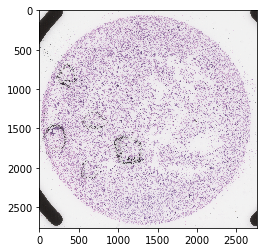

In [4]:
img_RGB =cv2.cvtColor(np.array(slide.read_region((0, 0),
                       level,
                       slide.level_dimensions[level]).convert('RGB')), cv2.COLOR_RGB2GRAY)
                      
source = np.array(slide.read_region((0, 0),
                       level,
                       slide.level_dimensions[level]).convert('RGB'))
plt.imshow(source, cmap="gray")

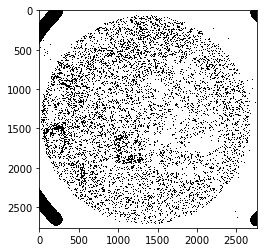

In [5]:
background = img_RGB > threshold_otsu(img_RGB)
tissue_mask = background
threshold_otsu(img_RGB)
plt.imshow(tissue_mask, cmap="gray")

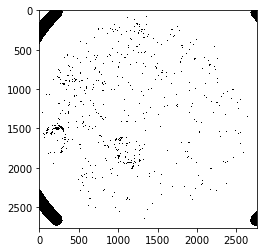

In [6]:
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)
img = np.array(tissue_mask * 255, dtype=np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")

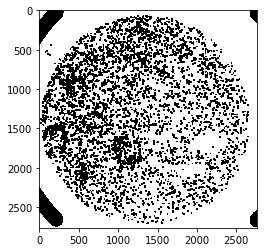

In [7]:
erosion = cv2.erode(dilation,kernel,iterations = 5)
plt.imshow(erosion, cmap="gray")

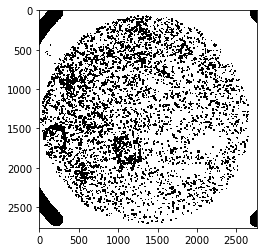

In [8]:
kernel = np.ones(kernel_size, np.uint8)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")

In [9]:
im2, contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

(2762, 2766)
Center: (1382, 1422); Radius: 1924


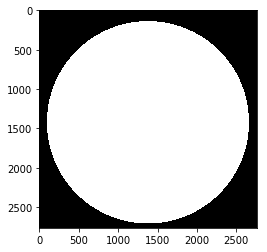

In [10]:
cnt = contours[0]
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = np.ones(tissue_mask.shape)
print(img.shape)
cv2.circle(img,center,radius//3*2, 0, -1)
#cv2.circle(img,center,radius//3*2,(255,0,0),30)
img = np.array((255 - img) / 255, dtype=np.uint8)
print("Center: {}; Radius: {}".format(center, radius))
# cv2.circle(img,center,3,(255,255,0),30)
# cv2.drawContours(img, [cnt], 0, (0,0,255), 30)
plt.imshow(img, cmap="gray")

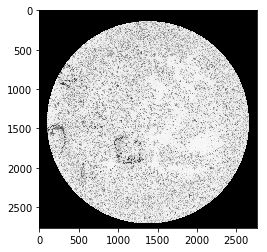

In [11]:
plt.imshow((img_RGB * img), cmap="gray")

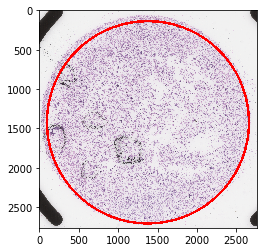

In [12]:
img3 = cv2.circle(source,center,radius//3*2,(255,0,0),30)
plt.imshow(img3, cmap="gray")

In [13]:
print(img_RGB.shape)
print(source.shape)

(2762, 2766)
(2762, 2766, 3)
